In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#df_presion = pd.read_csv('/content/drive/MyDrive/ atmospheric_project/Actualizacion/Presion_atm_update_2021.csv')
df_presion = pd.read_csv('Presion_atmoferica_limpio_2021.csv', index_col=0)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_presion.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Año
14350546,48015040,255.0,01/01/2021 07:31:00 AM,1001.0,PTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780000,-70.363000,Presión Atmosferica (1h),HPa,2021
14350547,24010390,255.0,01/01/2021 07:00:00 PM,726.0,El TRIANGULO - CAR,CUNDINAMARCA,LENGUAZAQUE,SOGAMOSO,5.305000,-73.619000,Presión Atmosferica (1h),HPa,2021
14350548,24055080,255.0,01/01/2021 01:00:00 PM,998.6,VIZCAINA LA LIZAMA - AUT,SANTANDER,BARRANCABERMEJA,SOGAMOSO,6.982972,-73.704889,Presión Atmosferica (1h),HPa,2021
14350549,24015506,255.0,01/01/2021 08:00:00 AM,754.0,CAPELLANIA - CAR,CUNDINAMARCA,FÚQUENE,SOGAMOSO,5.449000,-73.769000,Presión Atmosferica (1h),HPa,2021
14350550,48015040,255.0,01/01/2021 07:48:00 AM,1000.9,PTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780000,-70.363000,Presión Atmosferica (1h),HPa,2021


In [ ]:
df_presion.columns

Index(['Unnamed: 0', 'CodigoEstacion', 'CodigoSensor', 'FechaObservacion',
       'ValorObservado', 'NombreEstacion', 'Departamento', 'Municipio',
       'ZonaHidrografica', 'Latitud', 'Longitud', 'DescripcionSensor',
       'UnidadMedida', 'Año', 'Mes'],
      dtype='object')

# Presión atmosférica en Colombia

### 1 ¿Cuál es la ciudad con la presión atmosférica más alta y cuál es la ciudad con la presión atmosférica más baja?

In [ ]:
# Hacemos la filtracion de las columnas que vamos a utlizar 
df_presion = df_presion[['ValorObservado', 'NombreEstacion', 'Municipio']]

# Despues agrupamos con el campo que nos interesa y le sacamos el mean()
df_promedio_presion = df_presion.groupby(['Municipio']).mean()

In [ ]:
# Buscamos el municipio con mayor presion y lo ordenamos.
municipios_mas_presion = df_promedio_presion.sort_values(by='ValorObservado', ascending=False).head(1)
municipios_mas_presion

,ValorObservado
Municipio,
BAHÍA SOLANO (MUTIS),1011.751923


In [ ]:
# Menor presion
municipios_menos_presion = df_promedio_presion.sort_values(by='ValorObservado', ascending=True).head(1)
municipios_menos_presion

,ValorObservado
Municipio,
GUICÁN,573.880903


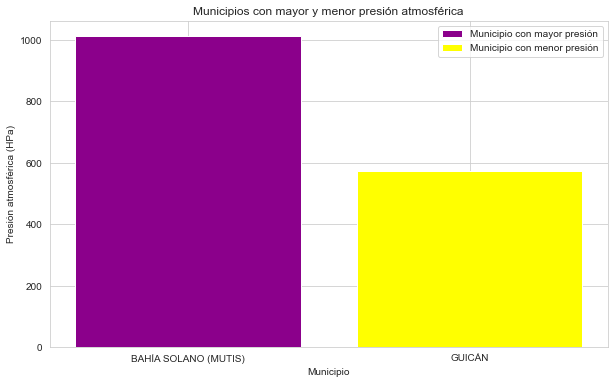

In [ ]:
# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras para los municipios con mayor presión
ax.bar(x=municipios_mas_presion.index, height=municipios_mas_presion["ValorObservado"], color="darkmagenta", label="Municipio con mayor presión")

# Crear un gráfico de barras para los municipios con menor presión
ax.bar(x=municipios_menos_presion.index, height=municipios_menos_presion["ValorObservado"], color="yellow", label="Municipio con menor presión")

# Añadir etiquetas y título al gráfico
ax.set_xlabel("Municipio")
ax.set_ylabel("Presión atmosférica (HPa)")
ax.set_title("Municipios con mayor y menor presión atmosférica")
ax.legend()

plt.show()

### 2 ¿Cuántas estaciones hay en el dataset y cuáles son sus nombres?

In [ ]:
# nunique(), devuelve el número de valores únicos en una columna
num_estaciones = df_presion['NombreEstacion'].nunique()
print(f'El numero de estaciones que hay son {num_estaciones}')

El numero de estaciones que hay son 174


In [ ]:
# Para ver los nombres de las estaciones que hay
df_presion['NombreEstacion'].unique()

array(['PTO NARIÑO', 'El TRIANGULO - CAR', 'VIZCAINA LA LIZAMA  - AUT',
       'CAPELLANIA - CAR', 'SINCERIN  - AUT', 'RAQUIRA - CAR',
       'APTO OLAYA HERRERA - TX GPRS', 'CACHIPAY - CAR', 'AYAPEL',
       'PR CHOCO: APTO EL CARANO', 'BERLIN - AUT',
       'CHARALA - ISAGEN - Estacion en Pruebas', 'PARAMO GUERRERO  - AUT',
       'CARIMAGUA', 'AEROPUERTO LAS FLORES  - AUT',
       'APTO EL DORADO - TX GPRS', 'PERENCO: TAMARA',
       'ESCUELA NAVAL BARRANQUILLA  - AUT',
       'APTO ERNESTO CORTIZOS TX GPRS', 'VIANI - CAR', 'NEOMUNDO - AUT',
       'CARDON EL', 'PR CHOCO: CERTEGUI', 'EL HATO - CAR', 'EL TUNEL',
       'PARAMO ALMORZADERO  - AUT', 'PUERTA ROJA - AUT',
       'APTO SESQUICENTENARIO TX GPRS', 'PERENCO: TOQUILLA',
       'APTO MATECAÑA TX GPS/GOES', 'APTO ALMIRANTE PADILLA TX GPRS',
       'EL GUAMO - AUT', 'SAN MARCOS - AUT', 'AEROPUERTO SAN LUIS - AUT',
       'SAN  VICENTE DE CHUCURI  - AUT', 'PR CHOCO: BELLAVISTA',
       'GUAMAL - CAR', 'SAN BENITO ABAD - LA MOJANA

### 3. ¿Cuántos sensores hay por estación?


In [ ]:
df_presion['NombreEstacion'].value_counts()

PTO NARIÑO                                   41544
SANTA HELENA  - AUT                           3094
CORRALITOS PULI                               2502
LA ESMERALDA-  - AUT                          2125
EL OKAL  - AUT                                2121
TABIO  - AUT                                  1887
EL SOCHE  - AUT                               1885
HACIENDA LA MESA  - AUT                       1779
ACOMODO EL                                    1768
UNIVERSIDAD SANTO TOMÁS  - AUT                1760
PARQUE SOPO  - AUT                            1726
LA RAMADA  - AUT                              1716
IBERIA LA                                     1692
EL DESTINO  - AUT                             1354
ESCUELA NAVAL BARRANQUILLA  - AUT              746
NEOMUNDO - AUT                                 746
PARAMO ALMORZADERO  - AUT                      745
LA MINA CERREJON  - AUT                        745
EL GUAMO - AUT                                 744
PARAMO GUERRERO  - AUT         

### 4. ¿Cuál es la presión atmosférica promedio por departamento? ¿Y por municipio?


In [ ]:
# Calcular la presión atmosférica promedio por departamento
presion_por_departamento = df_presion.groupby('Departamento')['ValorObservado'].mean()

In [ ]:
# Calcular la presión atmosférica promedio por municipio
presion_por_municipio = df_presion.groupby(['Departamento', 'Municipio'])['ValorObservado'].mean()

In [ ]:
print(f'La presión atmoférica promedio por departamento es: {presion_por_departamento}')

La presión atmoférica promedio por departamento es: Departamento
AMAZONAS                   996.892486
ANTIOQUIA                  804.097238
ARAUCA                     853.587690
ATLÁNTICO                 1010.137308
BOGOTA D.C.                717.361040
BOLIVAR                    892.134690
BOYACÁ                     746.760796
CALDAS                     719.551080
CAQUETA                    978.817802
CASANARE                   941.273664
CAUCA                      897.335417
CESAR                      986.497703
CHOCÓ                      980.002074
CUNDINAMARCA               774.065832
CÓRDOBA                   1003.652693
HUILA                      858.088031
LA GUAJIRA                1003.236024
MAGDALENA                  998.682856
META                       909.854545
NARIÑO                     759.923496
NORTE DE SANTANDER         882.804753
QUINDÍO                    812.487326
RISARALDA                  828.663636
SAN ANDRÉS PROVIDENCIA     998.046649
SANTANDER              

In [ ]:
print(f'La presión atmoférica promedio por municipio es: {presion_por_municipio}')      

La presión atmoférica promedio por municipio es: Departamento            Municipio             
AMAZONAS                LETICIA                   1000.196346
                        PUERTO NARIÑO              996.844611
ANTIOQUIA               ITUANGO                    812.226087
                        MEDELLÍN                   851.090500
                        RETIRO                     749.817361
                        RIONEGRO                   789.678231
                        SANTUARIO                  788.614931
ARAUCA                  ARAUCA                     995.735139
                        SARAVENA                   787.667193
ATLÁNTICO               BARRANQUILLA              1010.269035
                        SOLEDAD                   1007.247059
BOGOTA D.C.             BOGOTA, D.C                717.361040
BOLIVAR                 ACHÍ                      1006.385650
                        ARJONA                    1010.415738
                        CARTAGENA DE

### 5. ¿Qué meses tienen el valor máximo y mínimo de presión atmosférica?

---



In [ ]:
# Para buscar el mes con mayor presión atmoférica
mes_maximo = df_presion.loc[df_presion['ValorObservado'].idxmax(), 'Mes']
print(f'El mes con mayor valor presión es el {mes_maximo}')

 El mes con mayor valor presión es el 12


In [ ]:
# El mes menor
mes_minimo = df_presion.loc[df_presion['ValorObservado'].idxmin(), 'Mes']
print(f'El mes con menor valor presión es: {mes_minimo}')

El mes con menor valor presión es: 3


### 6. ¿Hay alguna correlación entre la latitud y la presión atmosférica?

* Primero, podemos seleccionar las columnas de interés 'Latitud' y 'ValorObservado' 

* Tener encuenta que, El valor de la correlación puede oscilar entre -1 y 1, donde un valor cercano a 1 indica una correlación positiva fuerte, un valor cercano a -1 indica una correlación negativa fuerte, y un valor cercano a 0 indica la falta de correlación.

In [ ]:
latitud = df_presion['Latitud']
presion = df_presion['ValorObservado']

correlacion = latitud.corr(presion)
print(f'La correlacion entre la latitud y la presion es: {correlacion}')

La correlacion entre la latitud y la presion es: -0.4965614961336959


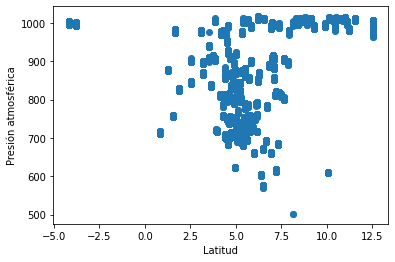

In [ ]:
# Este gráfico nos permitirá visualizar cualquier patrón o tendencia que pueda existir entre la latitud y la presión atmosférica
plt.scatter(latitud, presion)
plt.xlabel('Latitud')
plt.ylabel('Presión atmosférica')
plt.show()

### 7. ¿Hay alguna tendencia en la presión atmosférica a lo largo del tiempo en cada estación?


In [ ]:
#Sacamos las estaciones
estaciones = df_presion['NombreEstacion'].unique()

In [ ]:
#iteraremos sobre cada estación y para cada estación
for estacion in estaciones:
    df_estacion = df_presion[df_presion['NombreEstacion'] == estacion][['FechaObservacion', 'ValorObservado']]

In [ ]:
df_estacion['FechaObservacion'] = pd.to_datetime(df_estacion['FechaObservacion'])

In [ ]:
#Establecermos la columna 'FechaObservacion' como índice del DataFrame
df_estacion = df_estacion.set_index('FechaObservacion')

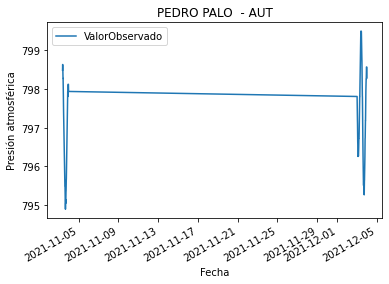

In [ ]:
#Gráfico de línea para cada estación que muestra la evolución de la presión atmosférica a lo largo del tiempo. 
df_estacion.plot(title=estacion)
plt.xlabel('Fecha')
plt.ylabel('Presión atmosférica')
plt.show()

### 8. ¿Cuáles son los departamentos y municipios con la mayor variabilidad en la presión
atmosférica?


*   Agrupar los datos por departamento y municipio
*   Calcular la desviación estándar de la columna 'ValorObservado'



In [ ]:
dept_mpio = df_presion.groupby(['Departamento', 'Municipio'])

In [ ]:
sacar_std = dept_mpio['ValorObservado'].std()

In [ ]:
# ordenar la serie de manera descendente 
ordenar_std = sacar_std.sort_values(ascending=False)
print(f'Departamentos y municipios con la mayor variabilidad en la presión atmosférica: {ordenar_std}')

In [ ]:
# Aqui estamos transformando la informacion de arriba como un DataFrame para que se vea mas detallado
df_std = pd.DataFrame({'ValorObservado':sacar_std})
df_std = df_std.reset_index() # Conviritiendo los indeicecs en columnas 
df_std = df_std[['Departamento', 'Municipio', 'ValorObservado']] # Cogemos las columnas para ordenarlas
df_std = df_std.sort_values('ValorObservado', ascending=False)
df_std.head(10)

,Departamento,Municipio,ValorObservado
8,ARAUCA,SARAVENA,191.910222
141,SANTANDER,TONA,89.703924
147,TOLIMA,IBAGUÉ,60.703594
51,CESAR,AGUACHICA,60.322473
11,BOGOTA D.C.,"BOGOTA, D.C",27.972235
94,CUNDINAMARCA,ZIPAQUIRÁ,24.653230
28,BOYACÁ,PAIPA,15.102315
80,CUNDINAMARCA,PASCA,9.637105
127,SAN ANDRÉS PROVIDENCIA,SAN ANDRÉS,9.381259
81,CUNDINAMARCA,PULÍ,4.812332


# Departamento del Atlántico

### 1. ¿Cuántas estaciones hay en el departamento del Atlántico y cuáles son sus nombres?

In [28]:
# Filtramos para solo la informacion del Atlántico
df_atlantico = df_presion.loc[df_presion['Departamento'] == 'ATLÁNTICO']

In [ ]:
df_atlantico['NombreEstacion'].value_counts()

ESCUELA NAVAL BARRANQUILLA  - AUT    746
APTO ERNESTO CORTIZOS TX GPRS         34
Name: NombreEstacion, dtype: int64

In [ ]:
num_estaciones_atlantico = df_atlantico['NombreEstacion'].nunique()
print(f'El numero de estaciones que hay en el Atlántico son {num_estaciones_atlantico}')

El numero de estaciones que hay en el Atlántico son 2


### 2. ¿Cuál es la presión atmosférica promedio en el departamento del Atlántico? ¿Cómo se compara con la presión atmosférica promedio a nivel nacional?



* Tener encuenta, que si el valor de diferencia es positivo, significa que la presión atmosférica promedio en el departamento del Atlántico es mayor que la presión atmosférica promedio a nivel nacional. Si es negativo, significa que es menor.



In [ ]:
# Cogemos filas correspondientes al departamento del Atlántico
df_atlantico = df_presion.loc[df_presion['Departamento'] == 'ATLÁNTICO']

In [ ]:
# Calcular la media de los valores de presión atmosférica en el departamento del Atlántico
media_atlantico = df_atlantico['ValorObservado'].mean()

In [ ]:
# Calcular la media de todos los valores de presión atmosférica en el conjunto de datos
media_nacional = df_presion['ValorObservado'].mean()

print(f'Presión atmosférica promedio a nivel nacional: {media_nacional}')

Presión atmosférica promedio a nivel nacional: 870.4379963627644


In [ ]:
# Comparamos 
diferencia = media_atlantico - media_nacional
print(f'Diferencia entre la presión atmosférica promedio en el departamento del Atlántico y a nivel nacional: {diferencia}')

Diferencia entre la presión atmosférica promedio en el departamento del Atlántico y a nivel nacional: 139.69931132954343


### 3. ¿Cuáles son los meses con el valor máximo y mínimo de presión atmosférica en el departamento del Atlántico?


In [ ]:
# Buscando el mes con maximo resion atmoferica
mes_maximo_atl = df_atlantico.loc[df_atlantico['ValorObservado'].idxmax(), 'Mes']
print(f'El mes con mayor valor de presión en el Atlántico es el {mes_maximo_atl}')

El mes con mayor valor de presión en el Atlántico es el 12


In [ ]:
mes_minimo_atl = df_atlantico.loc[df_atlantico['ValorObservado'].idxmin(), 'Mes']
print(f'El mes con menor valor de presión en el Atlántico es : {mes_minimo_atl}')

El mes con menor valor de presión en el Atlántico es : 4


### 4 ¿Hay alguna tendencia en la presión atmosférica a lo largo del tiempo en el departamento del Atlántico? ¿Ha habido algún cambio notable en los últimos años?

In [25]:
# df_atlantico[:,'Fecha'] = pd.to_datetime(df_atlantico['FechaObservacion'], format='%Y-%m-%d %H:%M:%S')
df_atlantico.loc[:, 'Fecha'] = pd.to_datetime(df_atlantico['FechaObservacion'], format='%Y-%m-%d %H:%M:%S')


<ipython-input-25-33e8cfc0be78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atlantico.loc[:, 'Fecha'] = pd.to_datetime(df_atlantico['FechaObservacion'], format='%Y-%m-%d %H:%M:%S')


In [26]:
df_atlantico_grouped = df_atlantico.groupby(['Año', 'Mes'])['ValorObservado'].mean().reset_index()

In [ ]:
plt.plot(df_atlantico_grouped['Fecha'], df_atlantico_grouped['ValorObservado'])
plt.xlabel('Fecha')
plt.ylabel('Presión atmosférica')
plt.title('Presión atmosférica promedio en el departamento del Atlántico')
plt.show()

### 5. ¿Cuál es la estación con la mayor variabilidad en la presión atmosférica en el departamento del Atlántico? ¿Y la que tiene la menor variabilidad?

In [30]:
# Agrupar los datos por estación y calcular la desviación estándar de la presión atmosférica para cada estación
sestacion_atl_std = df_atlantico.groupby('CodigoEstacion')['ValorObservado'].apply(np.std)

In [32]:
estacion_max_variabilidad_atl = sestacion_atl_std.idxmax()
estacion_min_variabilidad_atl = sestacion_atl_std.idxmin()

print(f'La mayor variabilidad en la presión atmosférica en el departamento del Atlántico es: {estacion_max_variabilidad_atl}')
print(f'La menor variabilidad en la presión atmosférica en el departamento del Atlántico es: {estacion_min_variabilidad_atl}')

La mayor variabilidad en la presión atmosférica en el departamento del Atlántico es: 29004520
La menor variabilidad en la presión atmosférica en el departamento del Atlántico es: 29045190


### 6. ¿Hay alguna correlación entre la presión atmosférica y la latitud o longitud de las estaciones en el departamento del Atlántico?

In [12]:
latitud_atl = df_atlantico['Latitud']
presion_atl = df_atlantico['ValorObservado']

correlacion = latitud_atl.corr(presion_atl)

### 8. ¿Cuáles son las estaciones con los valores máximos y mínimos de presión atmosférica en el departamento del Atlántico? ¿Cuánto difieren estos valores de la media del departamento?

In [ ]:
estacion_max = df_atlantico.loc[df_atlantico['ValorObservado'].idxmax(), 'NombreEstacion']
valor_max = df_atlantico['ValorObservado'].max()

In [ ]:
# Buscamos la estación con el valor mínimo de presión atmosférica
estacion_min = df_atlantico.loc[df_atlantico['ValorObservado'].idxmin(), 'NombreEstacion']
valor_min = df_atlantico['ValorObservado'].min()

In [ ]:
print(f'Estación con el valor máximo de presión atmosférica en el departamento del Atlántico: {estacion_max}, Con un valor de {valor_max}')
print(f'Estación con el valor mínimo de presión atmosférica en el departamento del Atlántico: {estacion_min}, con un valor de {valor_min}')

Estación con el valor máximo de presión atmosférica en el departamento del Atlántico: ESCUELA NAVAL BARRANQUILLA  - AUT, Con un valor de 1015.8
Estación con el valor mínimo de presión atmosférica en el departamento del Atlántico: APTO ERNESTO CORTIZOS TX GPRS, con un valor de 1005.0


In [ ]:
# calcular la diferencia entre los valores máximo y mínimo y la media
media_atlantico = df_atlantico['ValorObservado'].mean()
diferencia_max = valor_max - media_atlantico
diferencia_min = media_atlantico - valor_min

In [ ]:
print(f'Diferencia entre el valor máximo y la media del departamento del Atlántico: {diferencia_max}')
print(f'Diferencia entre el valor mínimo y la media del departamento del Atlántico: {diferencia_min}')

Diferencia entre el valor máximo y la media del departamento del Atlántico: 5.6626923076921685
Diferencia entre el valor mínimo y la media del departamento del Atlántico: 5.137307692307786
